# Importing Libraries

In [7]:
import pandas as pd
import numpy as np
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt

# Dataset
This dataset is taken from this link https://opendata.com.pk/dataset/crimes-reported-by-type 

In [11]:
data = pd.read_csv("C:/Users/zahid/Downloads/CrimeDatasetPakistan.csv")

# Introductory Details

In [12]:
data.head()

,_id,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
0,1,2012,Murder,6128,3726,2958,711,120,6,102,95,13846
1,2,2012,Attempt to Murder,7641,3732,2892,583,146,9,163,172,15338
2,3,2012,Kidnapping /Abduction,15699,3077,1052,386,70,6,32,288,20610
3,4,2012,Dacoity,2715,1341,60,98,22,1,8,12,4257
4,5,2012,Robbery,12181,4320,134,160,177,5,26,78,17081


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   _id          60 non-null     int64 
 1   Year         60 non-null     int64 
 2   Offence      60 non-null     object
 3   Punjab       60 non-null     int64 
 4   Sindh        60 non-null     int64 
 5   KP           60 non-null     int64 
 6   Balochistan  60 non-null     int64 
 7   Islamabad    60 non-null     int64 
 8   Railways     60 non-null     int64 
 9   G.B          60 non-null     int64 
 10  AJK          60 non-null     int64 
 11  Pakistan     60 non-null     int64 
dtypes: int64(11), object(1)
memory usage: 5.8+ KB


In [14]:
data.describe()

,_id,Year,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
count,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000
mean,30.500000,2014.500000,79055.900000,14763.366667,31113.833333,1758.166667,1517.733333,347.833333,308.466667,1199.900000,130065.200000
std,17.464249,1.722237,138782.467265,25794.011521,60948.397625,3099.910568,2709.241741,634.181661,534.831305,2199.744991,234047.594987
min,1.000000,2012.000000,602.000000,383.000000,45.000000,30.000000,12.000000,0.000000,2.000000,0.000000,1280.000000
25%,15.750000,2013.000000,5924.000000,1403.500000,204.250000,151.250000,91.500000,1.000000,22.750000,51.500000,9495.750000
50%,30.500000,2014.500000,12395.000000,2662.500000,1115.000000,263.000000,181.000000,4.500000,60.500000,153.000000,16394.500000
75%,45.250000,2016.000000,30760.000000,3762.500000,3150.250000,591.000000,529.000000,280.750000,101.250000,279.000000,35792.000000
max,60.000000,2017.000000,408148.000000,78688.000000,180830.000000,9492.000000,8396.000000,2115.000000,1736.000000,7085.000000,683925.000000


In [15]:
data.columns

Index(['_id', 'Year', 'Offence', 'Punjab', 'Sindh', 'KP', 'Balochistan',
       'Islamabad', 'Railways', 'G.B', 'AJK', 'Pakistan'],
      dtype='object')

In [16]:
data.index

RangeIndex(start=0, stop=60, step=1)

In [17]:
data.shape

(60, 12)

In [18]:
data2 = data.drop("_id", axis=1)
data2.head(5)

,Year,Offence,Punjab,Sindh,KP,Balochistan,Islamabad,Railways,G.B,AJK,Pakistan
0,2012,Murder,6128,3726,2958,711,120,6,102,95,13846
1,2012,Attempt to Murder,7641,3732,2892,583,146,9,163,172,15338
2,2012,Kidnapping /Abduction,15699,3077,1052,386,70,6,32,288,20610
3,2012,Dacoity,2715,1341,60,98,22,1,8,12,4257
4,2012,Robbery,12181,4320,134,160,177,5,26,78,17081


In [19]:
data_long =pd.melt(data2, id_vars=['Year', 'Offence'], var_name='Place' )
data_long

,Year,Offence,Place,value
0,2012,Murder,Punjab,6128
1,2012,Attempt to Murder,Punjab,7641
2,2012,Kidnapping /Abduction,Punjab,15699
3,2012,Dacoity,Punjab,2715
4,2012,Robbery,Punjab,12181
...,...,...,...,...
535,2017,Burglary,Pakistan,13833
536,2017,Cattle Theft,Pakistan,5342
537,2017,Other Theft,Pakistan,37304
538,2017,Others,Pakistan,577611


In [20]:
data_long= data_long.drop(data_long.loc[data_long['Place']== 'Pakistan'].index,axis=0)
data_long

,Year,Offence,Place,value
0,2012,Murder,Punjab,6128
1,2012,Attempt to Murder,Punjab,7641
2,2012,Kidnapping /Abduction,Punjab,15699
3,2012,Dacoity,Punjab,2715
4,2012,Robbery,Punjab,12181
...,...,...,...,...
475,2017,Burglary,AJK,216
476,2017,Cattle Theft,AJK,34
477,2017,Other Theft,AJK,72
478,2017,Others,AJK,6194


In [21]:
totals = data_long.loc[data_long['Offence'] == 'TOTAL RECORDED CRIME']
totals.head(10)

,Year,Offence,Place,value
9,2012,TOTAL RECORDED CRIME,Punjab,394603
19,2013,TOTAL RECORDED CRIME,Punjab,390408
29,2014,TOTAL RECORDED CRIME,Punjab,389618
39,2015,TOTAL RECORDED CRIME,Punjab,383055
49,2016,TOTAL RECORDED CRIME,Punjab,408148
59,2017,TOTAL RECORDED CRIME,Punjab,405845
69,2012,TOTAL RECORDED CRIME,Sindh,78688
79,2013,TOTAL RECORDED CRIME,Sindh,74990
89,2014,TOTAL RECORDED CRIME,Sindh,73773
99,2015,TOTAL RECORDED CRIME,Sindh,72630


In [22]:
KPK = data_long.loc[data_long['Place'] == 'KP']
KPK.head(10)

,Year,Offence,Place,value
120,2012,Murder,KP,2958
121,2012,Attempt to Murder,KP,2892
122,2012,Kidnapping /Abduction,KP,1052
123,2012,Dacoity,KP,60
124,2012,Robbery,KP,134
125,2012,Burglary,KP,500
126,2012,Cattle Theft,KP,118
127,2012,Other Theft,KP,717
128,2012,Others,KP,139344
129,2012,TOTAL RECORDED CRIME,KP,147775


In [23]:
crime_by_place=data_long.groupby('Place')['value'].sum()
crime_by_place

Place
AJK              71994
Balochistan     105490
G.B              18508
Islamabad        91064
KP             1866830
Punjab         4743354
Railways         20870
Sindh           885802
Name: value, dtype: int64

In [24]:
max = data_long.groupby('Place')['value'].max()
max

Place
AJK              7085
Balochistan      9492
G.B              1736
Islamabad        8396
KP             180830
Punjab         408148
Railways         2115
Sindh           78688
Name: value, dtype: int64

# Province Based Analysis 

In [25]:
# Punjab Crime
punjab_crime= data_long.loc[data_long['Place']=='Punjab'].groupby('Offence')['value'].sum()
punjab_crime

Offence
Attempt to Murder          36101
Burglary                   78229
Cattle Theft               37710
Dacoity                     9923
Kidnapping /Abduction      84758
Murder                     30381
Other Theft               187582
Others                   1837061
Robbery                    69932
TOTAL RECORDED CRIME     2371677
Name: value, dtype: int64

In [26]:
# KPK Crime
KPK_crime= data_long.loc[data_long['Place']=='KP'].groupby('Offence')['value'].sum()
KPK_crime

Offence
Attempt to Murder         17868
Burglary                   4447
Cattle Theft                690
Dacoity                     356
Kidnapping /Abduction      7042
Murder                    16643
Other Theft                5749
Others                   879426
Robbery                    1194
TOTAL RECORDED CRIME     933415
Name: value, dtype: int64

In [27]:
# Sindh Crime
KPK_crime= data_long.loc[data_long['Place']=='Sindh'].groupby('Offence')['value'].sum()
KPK_crime

Offence
Attempt to Murder         16196
Burglary                   8857
Cattle Theft               2850
Dacoity                    6152
Kidnapping /Abduction     17954
Murder                    15566
Other Theft               15814
Others                   340346
Robbery                   19166
TOTAL RECORDED CRIME     442901
Name: value, dtype: int64

In [28]:
# Balochistan Crime
Balochistan_crime= data_long.loc[data_long['Place']=='Balochistan'].groupby('Offence')['value'].sum()
Balochistan_crime

Offence
Attempt to Murder         2559
Burglary                   867
Cattle Theft               373
Dacoity                    384
Kidnapping /Abduction     1667
Murder                    3084
Other Theft               1671
Others                   41058
Robbery                   1082
TOTAL RECORDED CRIME     52745
Name: value, dtype: int64

In [29]:
# G B Crime
GB_crime= data_long.loc[data_long['Place']=='G.B'].groupby('Offence')['value'].sum()
GB_crime

Offence
Attempt to Murder         644
Burglary                  423
Cattle Theft              125
Dacoity                    32
Kidnapping /Abduction     204
Murder                    431
Other Theft               394
Others                   6903
Robbery                    98
TOTAL RECORDED CRIME     9254
Name: value, dtype: int64

In [30]:
# AJK Crime
AJK_crime= data_long.loc[data_long['Place']=='AJK'].groupby('Offence')['value'].sum()
AJK_crime

Offence
Attempt to Murder         1245
Burglary                  1303
Cattle Theft               209
Dacoity                     34
Kidnapping /Abduction     1649
Murder                     477
Other Theft                600
Others                   30142
Robbery                    338
TOTAL RECORDED CRIME     35997
Name: value, dtype: int64

In [31]:
# Islamabad Crime
Islamabad_crime= data_long.loc[data_long['Place']=='Islamabad'].groupby('Offence')['value'].sum()
Islamabad_crime

Offence
Attempt to Murder          948
Burglary                  1854
Cattle Theft               181
Dacoity                    184
Kidnapping /Abduction      557
Murder                     689
Other Theft               3339
Others                   36347
Robbery                   1433
TOTAL RECORDED CRIME     45532
Name: value, dtype: int64

# Visualization

<AxesSubplot:xlabel='Place', ylabel='value'>

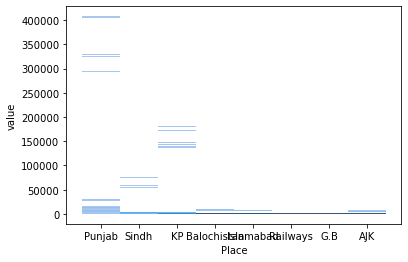

In [32]:
sns.histplot(data=data_long, x='Place', y='value', multiple='dodge')

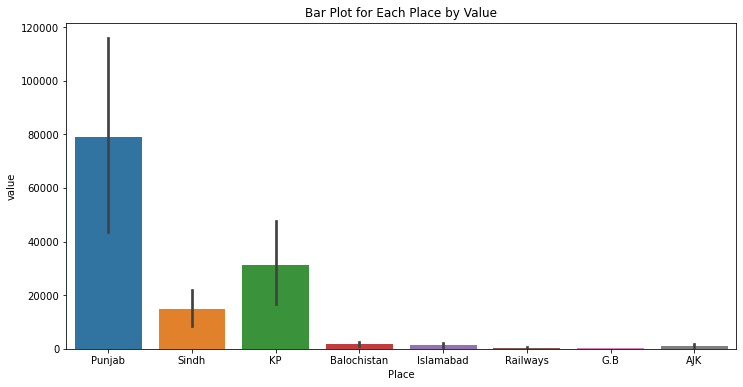

In [33]:
plt.figure(figsize=(12, 6))
sns.barplot(data = data_long, x = "Place", y = "value")
plt.title("Bar Plot for Each Place by Value")
plt.show()

<AxesSubplot:xlabel='Place', ylabel='value'>

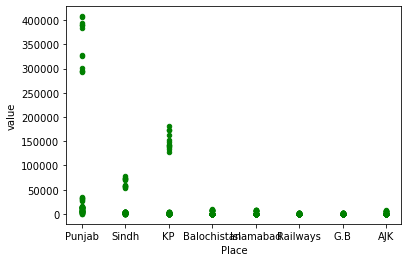

In [34]:
data_long.plot.scatter('Place', 'value', color = 'Green')

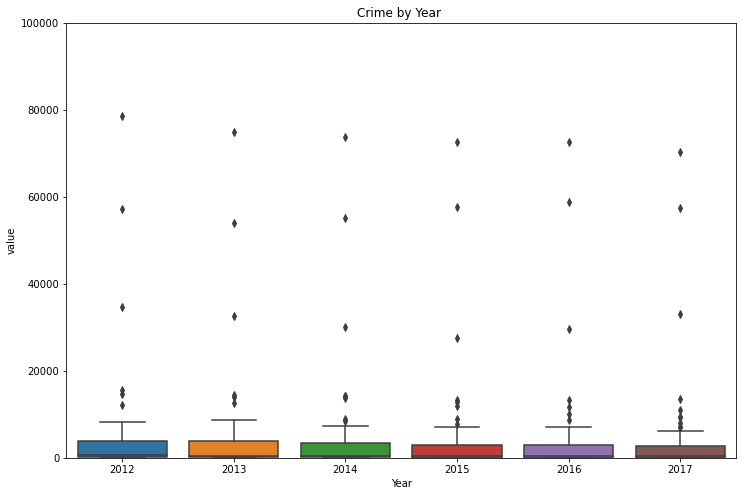

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data = data_long, x = "Year", y = "value")
plt.title("Crime by Year ")
plt.ylim([0, 100_000])
plt.show()

In [39]:
fig = make_subplots(
        rows=8,
        cols=2,
        subplot_titles=("Punjab", 'Sindh','','', 'KP', 'Balochistan','','', 'Islamabad','','','','' 'GB', 'AJK')

)
# Punjab
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=1, col=1)
# Sindh
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=1, col=2)
# KP
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=3, col=1)
# Balochistan
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=3, col=2)
# Islamabad
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=5, col=1)
# GB
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=7, col=1)
#AJK
fig.add_trace(go.Bar(x=punjab_crime.index, y=punjab_crime.values), row=7, col=2)

fig.update_layout(
    title_text='Crimes by Province',
    autosize=True,
    width=1000,
    height=1000,
    paper_bgcolor='White',
    font_color= 'black'
    )

<function matplotlib.pyplot.show(close=None, block=None)>

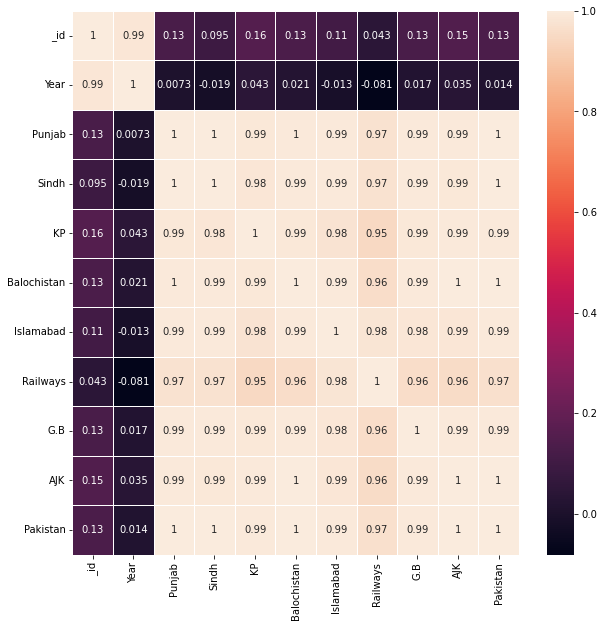

In [37]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), linewidths=0.5, annot=True)
plt.show


In [38]:
px.bar( 
    crime_by_place, 
    title='Total Crimes by Place 2012-2017', 
    labels={'_value':'Total Crime'}, 
    color= max, 
    color_continuous_scale='Thermal'
)

Follow for More: 

Github: https://www.github.com/ZaidArman 

Linkedin: https://www.linkedin.com/in/zaid-ullah07 

Twitter: https://www.twitter.com/ZaidArman_ 

Instagram: https://www.instagram.com/zaid__arman7 

Facebook: https://www.facebook.com/profile.php?id=100011010551170

Made by ❤️ Zaid Ullah ❤️